In [1]:
import qutip
from qutip import basis, tensor, Qobj, qeye, mesolve, ptrace, ket2dm
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.sparse as sp

/opt/anaconda3/envs/Qutip_E/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/envs/Qutip_E/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Simulation of the Markhov approximation')

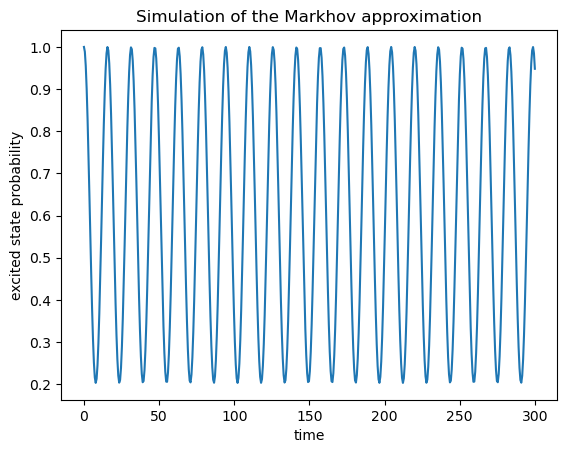

In [ ]:
#Set up Fock space
M = 5
#Set up qubit dimensions
qubit_dim = 2

#set up constants

omega_eg = 5
B_value = 0.3
g=1
#set up qubit operators
sig_min = basis(2, 0) * basis(2, 1).dag()
sig_pl = basis(2, 1) * basis(2, 0).dag()
I_qubit = qeye(2) 
#print("omega_eg =", omega_eg, type(omega_eg))
#print("B =", B, type(B))
def omega_n(n):
    omega0= omega_eg - B_value
    return omega0 + 2*B_value*n/M
#print(omega(2))
PUFFER=1


#set up the |n><n-1| operators etc
def a_op(n):
    fock_n = basis(M, n)
    fock_n1 = basis(M,n-1)
    return np.sqrt(n)*(fock_n1*fock_n.dag())
def a_deg_op(n):
    fock_n = basis(M, n)
    fock_n1 = basis(M,n-1)
    return np.sqrt(n)*(fock_n*fock_n1.dag())
def n_n_op(n):
    fock_n = basis(M, n)
    return fock_n*fock_n.dag()
def A_backup(n):
    const = n*PUFFER-omega_eg
    return const*tensor(n_n_op(n),I_qubit)
def A(n):
    const = n*omega_n(n)-omega_eg
    return const*tensor(n_n_op(n),I_qubit)
def B(n):
    const = g/np.sqrt(2*np.pi*M)
    S1 = np.sqrt(n)*tensor(a_deg_op(n),sig_min)
    S2 = np.sqrt(n)*tensor(a_op(n),sig_pl)
    return const * (S1 + S2)
#First part of the hamiltonian
A_part = 0
for m in range(1,M):
    A_part = A_part + A(m)
B_part= 0
for i in range(1,M):
    B_part = B_part + B(i)

H = A_part + B_part
H_nump = H.full()
#print(H_nump)

#initial state
qubit_init = basis(2, 1)
light_init = basis(M,0)
init_state = tensor(light_init, qubit_init)

init_nump = init_state.full()

def U(t):
    return scipy.linalg.expm(-1j*H_nump*t)
def psi(t):
    return U(t)@ init_nump


def components(t):
    c = []
    for i in range(2*M):
        #print(psi(t)[i])
        state = psi(t).flatten()
        c.append(state[i])
        #print(c)
        #print(comp)
    return c

def qutip_evolved(t):
    vec = 0
    for i in range(2*M):
        vec = vec + components(t)[i]*basis(2*M, i)
    return vec

def rho(t):
    return ket2dm(qutip_evolved(t))

def psi_red(t):
    matrix = rho(t)
    matrix.dims = [[M, 2], [M, 2]]
    return ptrace(matrix,1)

def p_ex(t):
    return psi_red(t)[1,1]

times = np.linspace(0,300,500)
#print(times)
probs = []
for t in times:
    probs.append(p_ex(t))

#print(probs)
plt.plot(times, probs)
plt.xlabel("time")
plt.ylabel("excited state probability")
plt.title("Simulation of the Markhov approximation")
#print(psi_red(3))


Text(0.5, 1.0, 'Simulation of the Markhov approximation')

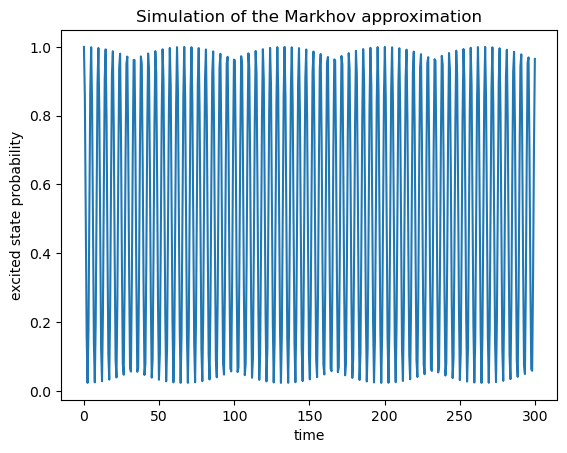

In [15]:
#Set up Fock space
M = 6
#Set up qubit dimensions
qubit_dim = 2

#set up constants

omega_eg = 5
B_value = 0.3
g=4

def omega_n(n):
    omega0= omega_eg - B_value
    return omega0 + 2*B_value*n/M
#print(omega(2))
PUFFER=1


#set up the |n><n-1| operators etc
def a_op(n):
    fock_n = basis(M, n)
    fock_n1 = basis(M,n-1)
    return np.sqrt(n)*(fock_n1*fock_n.dag())
def a_deg_op(n):
    fock_n = basis(M, n)
    fock_n1 = basis(M,n-1)
    return np.sqrt(n)*(fock_n*fock_n1.dag())
def n_n_op(n):
    fock_n = basis(M, n)
    return fock_n*fock_n.dag()
def A_backup(n):
    const = n*PUFFER-omega_eg
    return const*tensor(n_n_op(n),I_qubit)
def A(n):
    const = n*omega_n(n)-omega_eg
    return const*tensor(n_n_op(n),I_qubit)
def B(n):
    const = g/np.sqrt(2*np.pi*M)
    S1 = np.sqrt(n)*tensor(a_deg_op(n),sig_min)
    S2 = np.sqrt(n)*tensor(a_op(n),sig_pl)
    return const * (S1 + S2)
#First part of the hamiltonian
A_part = 0
for m in range(1,M):
    A_part = A_part + A(m)
B_part= 0
for i in range(1,M):
    B_part = B_part + B(i)

H = A_part + B_part
H_nump = H.full()
#print(H_nump)

#initial state
qubit_init = basis(2, 1)
light_init = basis(M,0)
init_state = tensor(light_init, qubit_init)

init_nump = init_state.full()

def U(t):
    return scipy.linalg.expm(-1j*H_nump*t)
def psi(t):
    return U(t)@ init_nump


def components(t):
    c = []
    for i in range(2*M):
        #print(psi(t)[i])
        state = psi(t).flatten()
        c.append(state[i])
        #print(c)
        #print(comp)
    return c

def qutip_evolved(t):
    vec = 0
    for i in range(2*M):
        vec = vec + components(t)[i]*basis(2*M, i)
    return vec

def rho(t):
    return ket2dm(qutip_evolved(t))

def psi_red(t):
    matrix = rho(t)
    matrix.dims = [[M, 2], [M, 2]]
    return ptrace(matrix,1)

def p_ex(t):
    return psi_red(t)[1,1]



probs = []
for t in times:
    probs.append(p_ex(t))
plt.plot(times, probs)
plt.xlabel("time")
plt.ylabel("excited state probability")
plt.title("Simulation of the Markhov approximation")

Text(0.5, 1.0, 'Simulation of the Markhov approximation')

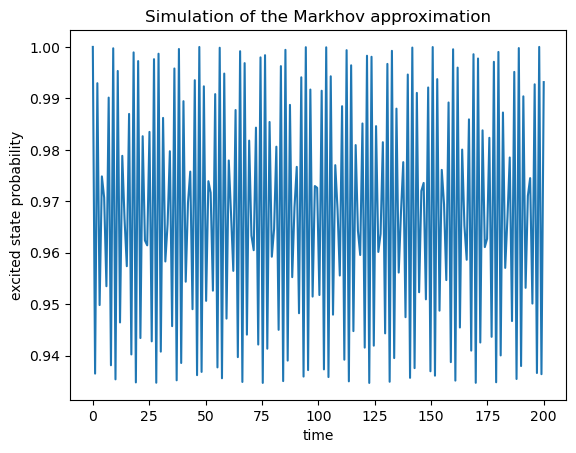

In [23]:
#Set up Fock space
M = 20
#Set up qubit dimensions
qubit_dim = 2

#set up constants

omega_eg = 5
B_value = 3
g=4

def omega_n(n):
    omega0= omega_eg - B_value
    return omega0 + 2*B_value*n/M
#print(omega(2))
PUFFER=1


#set up the |n><n-1| operators etc
def a_op(n):
    fock_n = basis(M, n)
    fock_n1 = basis(M,n-1)
    return np.sqrt(n)*(fock_n1*fock_n.dag())
def a_deg_op(n):
    fock_n = basis(M, n)
    fock_n1 = basis(M,n-1)
    return np.sqrt(n)*(fock_n*fock_n1.dag())
def n_n_op(n):
    fock_n = basis(M, n)
    return fock_n*fock_n.dag()
def A_backup(n):
    const = n*PUFFER-omega_eg
    return const*tensor(n_n_op(n),I_qubit)
def A(n):
    const = n*omega_n(n)-omega_eg
    return const*tensor(n_n_op(n),I_qubit)
def B(n):
    const = g/np.sqrt(2*np.pi*M)
    S1 = np.sqrt(n)*tensor(a_deg_op(n),sig_min)
    S2 = np.sqrt(n)*tensor(a_op(n),sig_pl)
    return const * (S1 + S2)
#First part of the hamiltonian
A_part = 0
for m in range(1,M):
    A_part = A_part + A(m)
B_part= 0
for i in range(1,M):
    B_part = B_part + B(i)

H = A_part + B_part
H_nump = H.full()
#print(H_nump)

#initial state
qubit_init = basis(2, 1)
light_init = basis(M,0)
init_state = tensor(light_init, qubit_init)

init_nump = init_state.full()

def U(t):
    return scipy.linalg.expm(-1j*H_nump*t)
def psi(t):
    return U(t)@ init_nump


def components(t):
    c = []
    for i in range(2*M):
        #print(psi(t)[i])
        state = psi(t).flatten()
        c.append(state[i])
        #print(c)
        #print(comp)
    return c

def qutip_evolved(t):
    vec = 0
    for i in range(2*M):
        vec = vec + components(t)[i]*basis(2*M, i)
    return vec

def rho(t):
    return ket2dm(qutip_evolved(t))

def psi_red(t):
    matrix = rho(t)
    matrix.dims = [[M, 2], [M, 2]]
    return ptrace(matrix,1)

def p_ex(t):
    return psi_red(t)[1,1]

times = np.linspace(0,200,200)

probs = []
for t in times:
    probs.append(p_ex(t))
plt.plot(times, probs)
plt.xlabel("time")
plt.ylabel("excited state probability")
plt.title("Simulation of the Markhov approximation")

In [20]:
#Set up Fock space
M = 30
#Set up qubit dimensions
qubit_dim = 2

#set up constants

omega_eg = 5
B_value = 3
g=2

def omega_n(n):
    omega0= omega_eg - B_value
    return omega0 + 2*B_value*n/M
#print(omega(2))
PUFFER=1


#set up the |n><n-1| operators etc
def a_op(n):
    fock_n = basis(M, n)
    fock_n1 = basis(M,n-1)
    return np.sqrt(n)*(fock_n1*fock_n.dag())
def a_deg_op(n):
    fock_n = basis(M, n)
    fock_n1 = basis(M,n-1)
    return np.sqrt(n)*(fock_n*fock_n1.dag())
def n_n_op(n):
    fock_n = basis(M, n)
    return fock_n*fock_n.dag()
def A_backup(n):
    const = n*PUFFER-omega_eg
    return const*tensor(n_n_op(n),I_qubit)
def A(n):
    const = n*omega_n(n)-omega_eg
    return const*tensor(n_n_op(n),I_qubit)
def B(n):
    const = g/np.sqrt(2*np.pi*M)
    S1 = np.sqrt(n)*tensor(a_deg_op(n),sig_min)
    S2 = np.sqrt(n)*tensor(a_op(n),sig_pl)
    return const * (S1 + S2)
#First part of the hamiltonian
A_part = 0
for m in range(1,M):
    A_part = A_part + A(m)
B_part= 0
for i in range(1,M):
    B_part = B_part + B(i)

H = A_part + B_part
H_nump = H.full()
#print(H_nump)

#initial state
qubit_init = basis(2, 1)
light_init = basis(M,0)
init_state = tensor(light_init, qubit_init)

init_nump = init_state.full()

def U(t):
    return scipy.linalg.expm(-1j*H_nump*t)
def psi(t):
    return U(t)@ init_nump


def components(t):
    c = []
    for i in range(2*M):
        #print(psi(t)[i])
        state = psi(t).flatten()
        c.append(state[i])
        #print(c)
        #print(comp)
    return c

def qutip_evolved(t):
    vec = 0
    for i in range(2*M):
        vec = vec + components(t)[i]*basis(2*M, i)
    return vec

def rho(t):
    return ket2dm(qutip_evolved(t))

def psi_red(t):
    matrix = rho(t)
    matrix.dims = [[M, 2], [M, 2]]
    return ptrace(matrix,1)

def p_ex(t):
    return psi_red(t)[1,1]

times = np.linspace(0,300,100)

probs = []
for t in times:
    probs.append(p_ex(t))
plt.plot(times, probs)
plt.xlabel("time")
plt.ylabel("excited state probability")
plt.title("Simulation of the Markhov approximation")

KeyboardInterrupt: 

# c)

I tried a few more parameters than shown here (i just plotted again with other parameters). The code runs for quite a long time for large M, so I think I didn't find the right parameters that give the prettiest decay/recurrences. We can however see, that for bigger M, the interferences of the modes let the excitation probabilty die down (and come back later). The recurrences occurr whenever the time makes all the amplitudes become 2pi*n, then they interfere constructively again and we get the revivals. 